In [1]:
# --- deps: pip install filterpy sympy numpy ---
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/UAV/log0001/px4/09_00_22_actuator_motors_0.csv')
print(data.head)

<bound method NDFrame.head of        timestamp  timestamp_sample    control[0]    control[1]    control[2]  \
0      603055735         603055441  2.136615e-03  5.258889e-11  2.136615e-03   
1      603056948         603056668  2.136614e-03  7.465131e-11  1.605764e-03   
2      603058180         603057903  1.395877e-03  7.908957e-11  1.097319e-03   
3      603059413         603059139  6.566017e-11  2.123350e-03  6.413911e-04   
4      603060668         603060374  3.768626e-11  2.136614e-03  0.000000e+00   
...          ...               ...           ...           ...           ...   
15626  657906019         657905747  1.595759e-10  2.168072e-03  4.951881e-13   
15627  657909726         657909452  4.849039e-10  2.168072e-03  2.585254e-12   
15628  657912227         657911925  1.094705e-10  2.168072e-03  6.944820e-12   
15629  657915911         657915628  1.195423e-10  2.168072e-03  5.109749e-13   
15630  657919638         657919333  2.412268e-10  2.168072e-03  6.987528e-13   

       co

In [3]:
timestamps = data['timestamp']
print(timestamps.head)

<bound method NDFrame.head of 0        603055735
1        603056948
2        603058180
3        603059413
4        603060668
           ...    
15626    657906019
15627    657909726
15628    657912227
15629    657915911
15630    657919638
Name: timestamp, Length: 15631, dtype: int64>


In [4]:
controls = data[['control[0]','control[1]','control[2]','control[3]']]
print(controls.head)

<bound method NDFrame.head of          control[0]    control[1]    control[2]  control[3]
0      2.136615e-03  5.258889e-11  2.136615e-03    0.000000
1      2.136614e-03  7.465131e-11  1.605764e-03    0.000531
2      1.395877e-03  7.908957e-11  1.097319e-03    0.001780
3      6.566017e-11  2.123350e-03  6.413911e-04    0.001508
4      3.768626e-11  2.136614e-03  0.000000e+00    0.002137
...             ...           ...           ...         ...
15626  1.595759e-10  2.168072e-03  4.951881e-13    0.002168
15627  4.849039e-10  2.168072e-03  2.585254e-12    0.002168
15628  1.094705e-10  2.168072e-03  6.944820e-12    0.002168
15629  1.195423e-10  2.168072e-03  5.109749e-13    0.002168
15630  2.412268e-10  2.168072e-03  6.987528e-13    0.002168

[15631 rows x 4 columns]>


In [5]:
controls_percentage = controls * 100
print(controls_percentage.head)

<bound method NDFrame.head of          control[0]    control[1]    control[2]  control[3]
0      2.136615e-01  5.258889e-09  2.136615e-01    0.000000
1      2.136614e-01  7.465131e-09  1.605764e-01    0.053085
2      1.395877e-01  7.908957e-09  1.097319e-01    0.178003
3      6.566017e-09  2.123350e-01  6.413911e-02    0.150849
4      3.768626e-09  2.136614e-01  0.000000e+00    0.213662
...             ...           ...           ...         ...
15626  1.595759e-08  2.168072e-01  4.951881e-11    0.216807
15627  4.849039e-08  2.168072e-01  2.585254e-10    0.216807
15628  1.094705e-08  2.168072e-01  6.944820e-10    0.216807
15629  1.195423e-08  2.168072e-01  5.109749e-11    0.216807
15630  2.412268e-08  2.168072e-01  6.987528e-11    0.216807

[15631 rows x 4 columns]>


In [6]:
RPM_max = 15000

omega_max = RPM_max * (2 * np.pi / 60)  # rad/s

controls_angular_velocity = controls * omega_max

print(controls_angular_velocity.head)

<bound method NDFrame.head of          control[0]    control[1]    control[2]  control[3]
0      3.356186e+00  8.260644e-08  3.356187e+00    0.000000
1      3.356186e+00  1.172620e-07  2.522328e+00    0.833857
2      2.192639e+00  1.242336e-07  1.723665e+00    2.796070
3      1.031388e-07  3.335350e+00  1.007495e+00    2.369528
4      5.919743e-08  3.356186e+00  0.000000e+00    3.356187
...             ...           ...           ...         ...
15626  2.506612e-07  3.405600e+00  7.778396e-10    3.405600
15627  7.616853e-07  3.405600e+00  4.060908e-09    3.405598
15628  1.719559e-07  3.405600e+00  1.090890e-08    3.405600
15629  1.877766e-07  3.405600e+00  8.026376e-10    3.405600
15630  3.789182e-07  3.405600e+00  1.097598e-09    3.405600

[15631 rows x 4 columns]>


In [7]:
controls_angular_velocity_sq = controls_angular_velocity ** 2

16
16


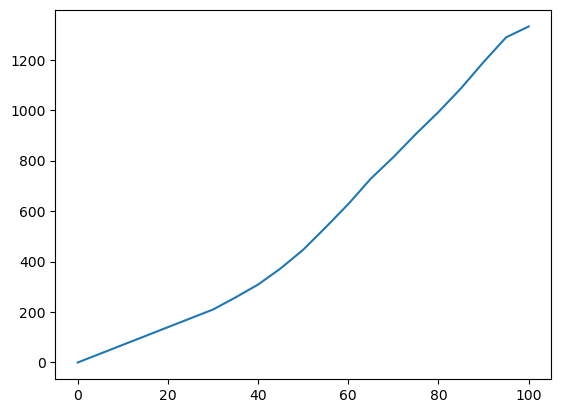

In [8]:
x = np.array([0,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
y = np.array([0,210,258,309,373,447,536,628,729,814,906,993,1087,1191,1289,1332])

print(x.size)
print(y.size)

plt.plot(x,y)
plt.show()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


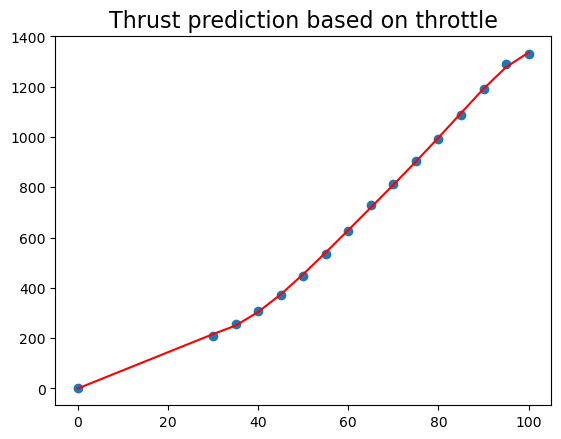

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=6, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

model = LinearRegression()
model.fit(poly_features,y)

y_predicted = model.predict(poly_features)

plt.title("Thrust prediction based on throttle", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

In [10]:
b = 1.29e-5

controls_thrust = controls_angular_velocity_sq * b
print(controls_thrust.head)

<bound method NDFrame.head of          control[0]    control[1]    control[2]  control[3]
0      1.453054e-04  8.802732e-20  1.453055e-04    0.000000
1      1.453054e-04  1.773799e-19  8.207159e-05    0.000009
2      6.201887e-05  1.990985e-19  3.832616e-05    0.000101
3      1.372251e-19  1.435068e-04  1.309409e-05    0.000072
4      4.520594e-20  1.453054e-04  0.000000e+00    0.000145
...             ...           ...           ...         ...
15626  8.105204e-19  1.496157e-04  7.804945e-24    0.000150
15627  7.484121e-18  1.496157e-04  2.127336e-22    0.000150
15628  3.814377e-19  1.496157e-04  1.535152e-21    0.000150
15629  4.548548e-19  1.496157e-04  8.310529e-24    0.000150
15630  1.852169e-18  1.496157e-04  1.554092e-23    0.000150

[15631 rows x 4 columns]>


[[2.13661460e-01 4.56512195e-02 9.75390621e-03 2.08403384e-03
  4.45277713e-04 9.51386863e-05]
 [2.13661420e-01 4.56512024e-02 9.75390073e-03 2.08403228e-03
  4.45277296e-04 9.51385794e-05]
 [1.39587710e-01 1.94847288e-02 2.71982867e-03 3.79654656e-04
  5.29951240e-05 7.39746800e-06]
 ...
 [1.09470500e-08 1.19837904e-16 1.31187152e-24 1.43611232e-32
  1.57211933e-40 1.72100689e-48]
 [1.19542320e-08 1.42903663e-16 1.70830354e-24 2.04214568e-32
  2.44122833e-40 2.91830098e-48]
 [2.41226840e-08 5.81903883e-16 1.40370835e-23 3.38612129e-31
  8.16823340e-39 1.97039713e-46]]


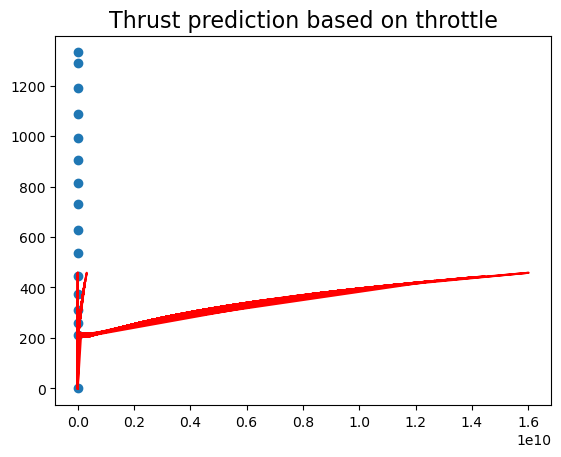

In [11]:
poly_percentage = poly.fit_transform(np.array(abs(controls_percentage['control[0]'])).reshape(-1, 1))

print(poly_percentage)

y_predicted = model.predict(poly_percentage)

plt.title("Thrust prediction based on throttle", size=16)
plt.scatter(x, y)
plt.plot(poly_percentage, y_predicted, c="red")
#plt.show()

#print(y_predicted)

In [12]:
px, py, pz, vx, vy, vz, qw, qx, qy, qz = sp.symbols('p_{x} p_{y} p_{z} v_{x} v_{y} v_{z} q_{w} q_{x} q_{y} q_{z}')
x = sp.Matrix([px, py, pz, vx, vy, vz, qw, qx, qy, qz])

In [13]:
d = 0.15   # lever arm, distance
b = 1.5    # thrust coefficient
k = 1.68e-7   # torque coefficient

T = np.array([
    [ b,  b,  b,  b],
    [-d*b, d*b, d*b, -d*b],
    [ d*b, -d*b, d*b, -d*b],
    [ k,  k, -k, -k]
], dtype=float)

data[['T_total', 'roll', 'pitch', 'yaw']] = controls_angular_velocity_sq @ T.T   # result columns: [thrust, τx, τy, τz]

print(data[['T_total', 'roll', 'pitch', 'yaw']].head())

     T_total          roll     pitch           yaw
0  33.791967  9.489394e-07  5.068795 -7.085414e-13
1  27.482159 -1.259361e+00  3.809431  7.066963e-07
2  23.395039 -2.172297e+00 -0.008848 -1.004869e-06
3  26.631401  1.468112e+00 -3.537940  7.551353e-07
4  33.791961 -1.897879e-06 -5.068794 -1.417083e-12


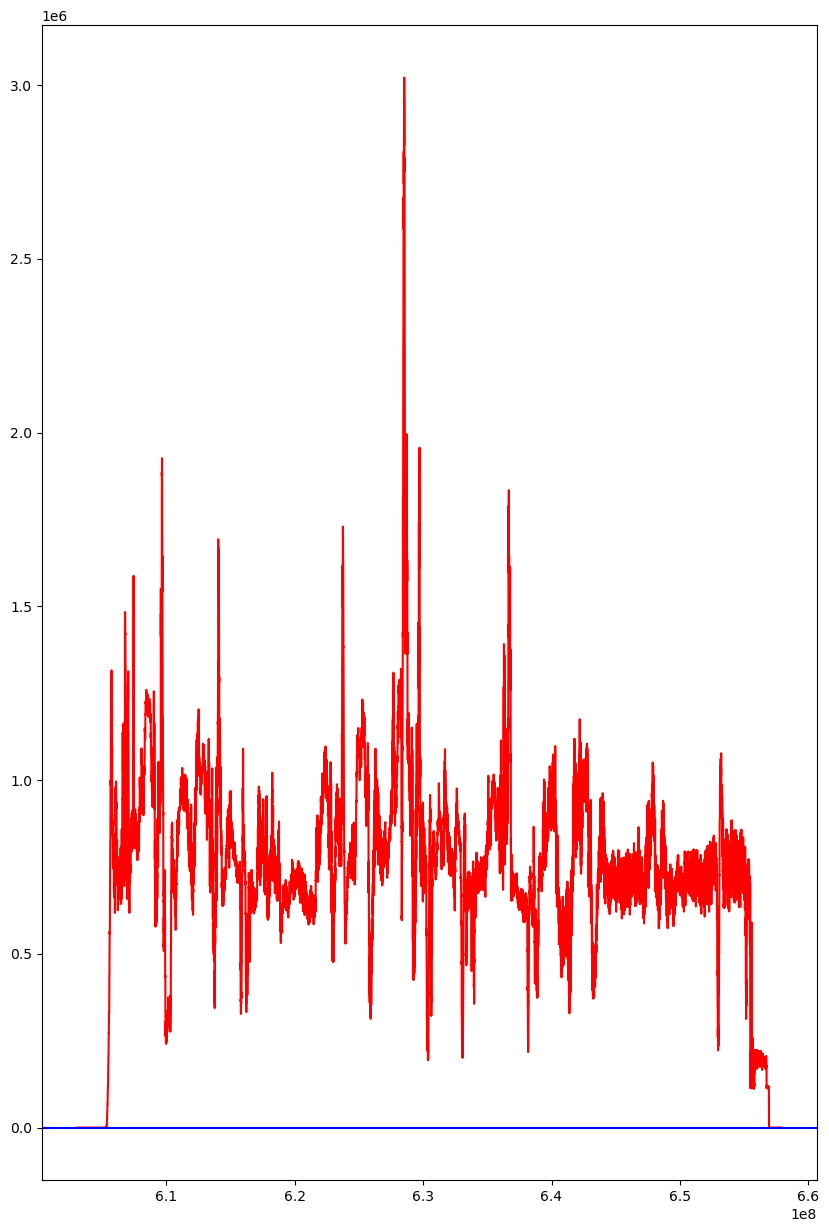

In [14]:
fig = plt.figure(figsize=(10,15))
x = np.array(data['timestamp'])
y = np.array(data['T_total'])

plt.plot(x,y,'red')
plt.axhline(y=10.54575, color='blue', linestyle='-')

plt.show()

In [15]:
m = 1.075
g = 9.81

data['a_bz'] = data['T_total'] / m

print(data['a_bz'])

0        0.000270
1        0.000220
2        0.000187
3        0.000213
4        0.000270
           ...   
15626    0.000278
15627    0.000278
15628    0.000278
15629    0.000278
15630    0.000278
Name: a_bz, Length: 15631, dtype: float64


In [16]:
def rotation_matrix(roll, pitch, yaw):
    cr, sr = np.cos(roll), np.sin(roll)
    cp, sp = np.cos(pitch), np.sin(pitch)
    cy, sy = np.cos(yaw), np.sin(yaw)
    return np.array([
        [cy*cp, cy*sp*sr - sy*cr, cy*sp*cr + sy*sr],
        [sy*cp, sy*sp*sr + cy*cr, sy*sp*cr - cy*sr],
        [-sp,   cp*sr,             cp*cr]
    ])

In [17]:
# preallocate arrays
a_world = np.zeros((len(data), 3))

for i, row in data.iterrows():
    R = rotation_matrix(row['roll'], row['pitch'], row['yaw'])
    a_body = np.array([0, 0, row['a_bz']])
    # transform to world frame
    a_world[i, :] = R @ a_body + np.array([0, 0, g])  # add gravity in world frame

data[['a_x', 'a_y', 'a_z']] = a_world
print(data[['a_x', 'a_y', 'a_z']])

                a_x           a_y       a_z
0      1.178438e-08 -2.206186e-15  9.810270
1      7.202765e-09  2.381171e-09  9.810220
2     -1.423766e-11  3.496482e-09  9.810187
3     -6.482354e-09 -2.689940e-09  9.810213
4     -1.178437e-08  4.412370e-15  9.810270
...             ...           ...       ...
15626 -1.249387e-08  3.353301e-23  9.810278
15627 -1.249385e-08 -8.067748e-15  9.810278
15628 -1.249386e-08 -2.305073e-15  9.810278
15629 -1.249387e-08  1.938653e-23  9.810278
15630 -1.249386e-08 -2.305073e-15  9.810278

[15631 rows x 3 columns]


In [18]:
vel = np.zeros_like(a_world)
pos = np.zeros_like(a_world)

for i in range(1, len(data)):
    dt = data['timestamp'][i] - data['timestamp'][i-1]
    
    vel[i] = vel[i-1] + a_world[i-1] * dt
    pos[i] = pos[i-1] + vel[i-1] * dt + 0.5 * a_world[i-1] * dt**2

data[['v_x', 'v_y', 'v_z']] = vel
data[['x', 'y', 'z']] = pos

print(data[['x', 'y', 'z']])

                  x             y             z
0      0.000000e+00  0.000000e+00  0.000000e+00
1      8.669584e-03 -1.623057e-09  7.217264e+06
2      3.174661e-02  1.807094e-03  2.932298e+07
3      6.030225e-02  8.082055e-03  6.635494e+07
4      8.425145e-02  1.505587e-02  1.193635e+08
...             ...           ...           ...
15626 -1.359264e+14 -9.070117e+13  2.326535e+16
15627 -1.359128e+14 -9.069528e+13  2.326847e+16
15628 -1.359036e+14 -9.069131e+13  2.327058e+16
15629 -1.358900e+14 -9.068545e+13  2.327368e+16
15630 -1.358763e+14 -9.067953e+13  2.327682e+16

[15631 rows x 3 columns]


In [19]:
import ipywidgets as widgets
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def theta (t):
    fig = plt.figure(figsize=(10,15))
    ax = plt.axes(projection ='3d')
    z  = np.array(data['z'])
    x = np.array(data['x'])
    y = np.array(data['y'])
    ax.plot3D(x,y,z,'red')
    plt.show()

# Slider (or Play)
t_slider = widgets.Play(
    value=0,
    min=0,
    max=len(x)-1,
    step=1,
    interval=50,
    description="t"
)

widgets.interact(theta, t=t_slider)    
#widgets.interact(theta , t= widgets.Play(min=0,max =15))

interactive(children=(Play(value=0, description='t', interval=50, max=15630), Output()), _dom_classes=('widget…

<function __main__.theta(t)>